In [90]:
# import necessary libraries
import pandas as pd

# load dataset
data = pd.read_csv('ecommerce_furniture_dataset_2024.csv')

# print first 5 rows using head
data.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [91]:
# check for missing values
data.isnull().sum()

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

In [92]:
# drop rows with missing values
data = data.dropna()
data.isnull().sum()

productTitle     0
originalPrice    0
price            0
sold             0
tagText          0
dtype: int64

In [93]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Duplicate rows: 17


In [94]:
# cleaning price strings
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)
data['originalPrice'] = data['originalPrice'].replace('[\$,]','',regex=True).astype(float)

In [95]:
data.head()

,productTitle,originalPrice,price,sold,tagText
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,Free shipping
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,Free shipping
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,Free shipping


In [96]:
# import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

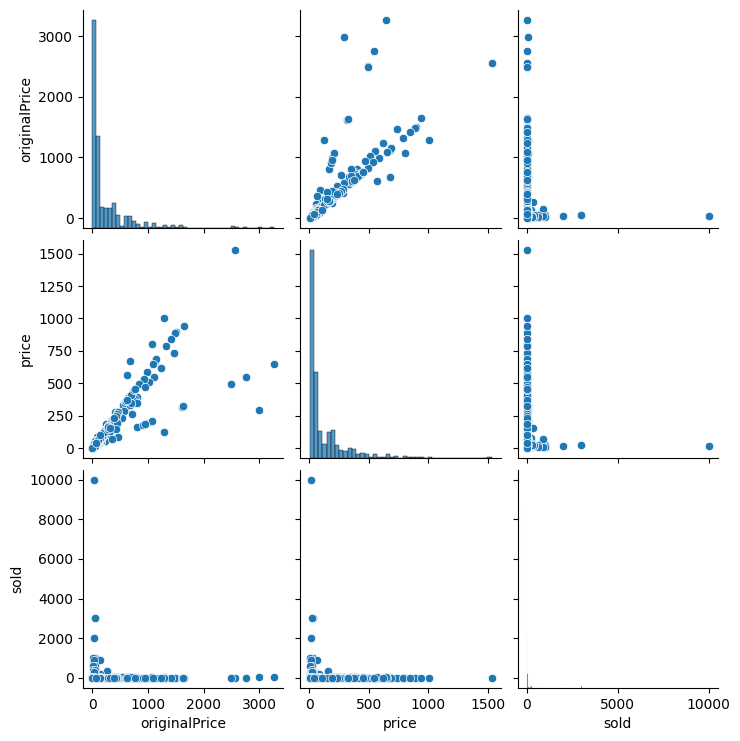

In [97]:
# Relationship between features and target variables
sns.pairplot(data, vars = ['originalPrice', 'price', 'sold'], kind='scatter')

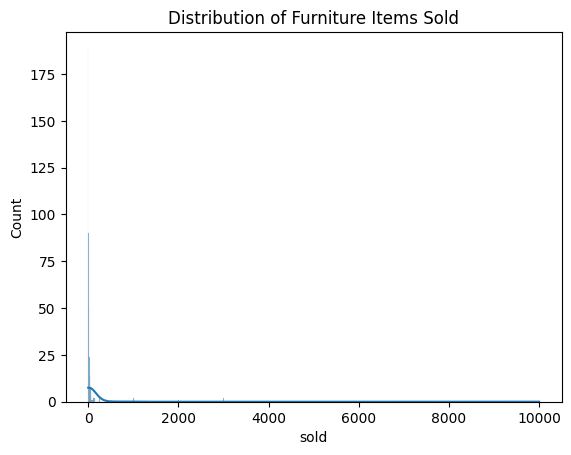

In [98]:
# distribution of sold variable
sns.histplot(data['sold'], kde=True)
plt.title('Distribution of Furniture Items Sold')
plt.show()

<Axes: xlabel='tagText', ylabel='count'>

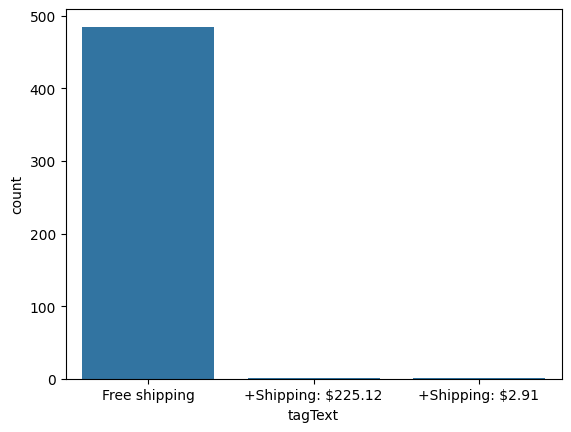

In [99]:
# plot number of occurrences of each unique value in the tagText column
sns.countplot(x='tagText', data=data)

<Axes: >

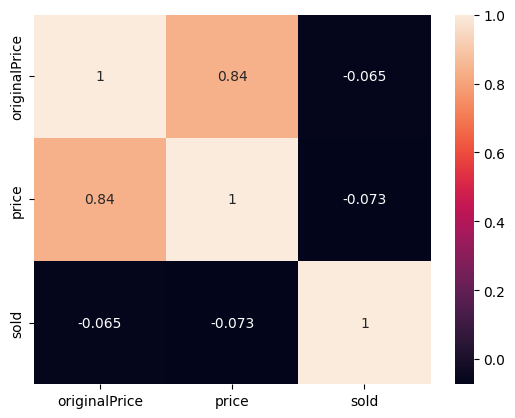

In [100]:
# selecting columns with numerical values during correlation calculation
corr = data.drop(columns=['productTitle','tagText']).corr()
# use heatmap to visualize correlation
sns.heatmap(corr, annot=True)

In [101]:
# import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer

In [102]:
# create a new discount feature
data['discount'] = ((data['originalPrice']-data['price'])/data['originalPrice'])*100
data.head()

,productTitle,originalPrice,price,sold,tagText,discount
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping,49.668367
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,56.226956
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,Free shipping,90.463973
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,Free shipping,50.169926
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,Free shipping,50.669427


In [103]:
# convert productTitle to numerical
tfidf = TfidfVectorizer(max_features=100)
productTitle_tfidf = tfidf.fit_transform(data['productTitle'])

# convert it to a dataframe
productTitle_df = pd.DataFrame(productTitle_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# append with our data
data = pd.concat([data,productTitle_df], axis=1).drop(['productTitle'],axis=1)
data.head()

,originalPrice,price,sold,tagText,discount,adjustable,and,bed,bedroom,bedside,...,under,upholstered,vanity,velvet,wardrobe,white,wicker,with,wood,wooden
2,78.40,39.46,7.0,Free shipping,49.668367,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.312660,0.142439,0.0,0.0
4,48.82,21.37,1.0,Free shipping,56.226956,0.000000,0.191265,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.294782,0.134294,0.0,0.0
5,1294.04,123.40,53.0,Free shipping,90.463973,0.306330,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
7,1474.17,734.58,5.0,Free shipping,50.169926,0.306254,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
20,671.47,331.24,39.0,Free shipping,50.669427,0.000000,0.176284,0.0,0.173699,0.0,...,0.0,0.0,0.528684,0.0,0.0,0.524109,0.000000,0.123775,0.0,0.0


In [104]:
# label encoding of tagText
from sklearn.preprocessing import LabelEncoder
data['tagText'] = LabelEncoder().fit_transform(data['tagText'])
data.head()

,originalPrice,price,sold,tagText,discount,adjustable,and,bed,bedroom,bedside,...,under,upholstered,vanity,velvet,wardrobe,white,wicker,with,wood,wooden
2,78.40,39.46,7.0,2,49.668367,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.312660,0.142439,0.0,0.0
4,48.82,21.37,1.0,2,56.226956,0.000000,0.191265,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.294782,0.134294,0.0,0.0
5,1294.04,123.40,53.0,2,90.463973,0.306330,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
7,1474.17,734.58,5.0,2,50.169926,0.306254,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
20,671.47,331.24,39.0,2,50.669427,0.000000,0.176284,0.0,0.173699,0.0,...,0.0,0.0,0.528684,0.0,0.0,0.524109,0.000000,0.123775,0.0,0.0


In [105]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [106]:
# initialize features and target variables
x = data.drop('sold', axis=1)
y = data['sold']

# split the data
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.2, random_state=42)

# clean the training data
x_train_df = pd.DataFrame(x_train)
y_train_df = pd.Series(y_train)

# combine x and y
train_df = x_train_df.copy()
train_df['target'] = y_train_df

train_df = train_df.dropna(subset=['target'])

# seperate back now
x_train_clean = train_df.drop('target', axis=1)
y_train_clean = train_df['target']

In [110]:
# model building
linear_model = LinearRegression()
randomforestmodel = RandomForestRegressor(n_estimators=100, random_state=42)

In [113]:
# model training
linear_model.fit(x_train_clean, y_train_clean)
randomforestmodel.fit(x_train_clean, y_train_clean)

RandomForestRegressor(random_state=42)

In [114]:
x_test_df = pd.DataFrame(x_test)
y_test_df = pd.Series(y_test)

test_df = x_test_df.copy()
test_df['target'] = y_test_df

test_df = test_df.dropna(subset=['target'])

x_test_clean = test_df.drop('target', axis=1)
y_test_clean = test_df['target']

In [115]:
from sklearn.metrics import mean_squared_error, r2_score

# prediction with linear regression
y_pred_linear = linear_model.predict(x_test_clean)
y_pred_random = randomforestmodel.predict(x_test_clean)

# mean squared error 
mse_linear = mean_squared_error(y_test_clean, y_pred_linear)
mse_random = mean_squared_error(y_test_clean, y_pred_random)

# r2 score
r2_linear = r2_score(y_test_clean, y_pred_linear)
r2_random = r2_score(y_test_clean, y_pred_linear)

In [116]:
# print results
print('Linear Regression MSE:', mse_linear)
print('Random Forest MSE:', mse_random)
print('Linear Regression r2:', r2_linear)
print('Random Forest r2:', r2_random)

Linear Regression MSE: 176394.6964639949
Random Forest MSE: 136072.92675714285
Linear Regression r2: -0.50658057260982
Random Forest r2: -0.50658057260982
